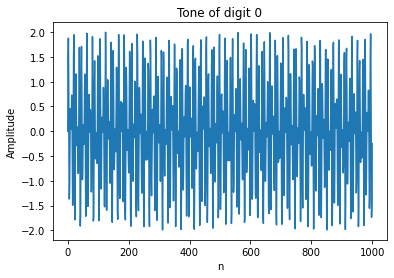

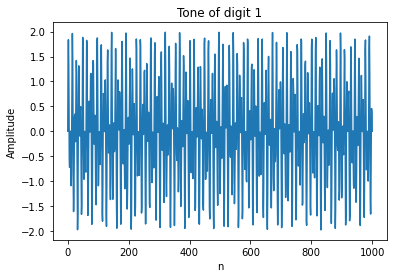

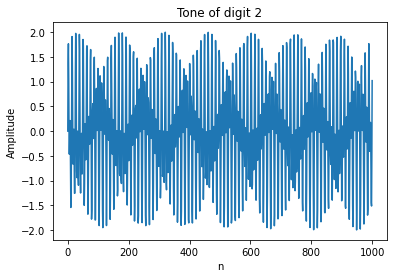

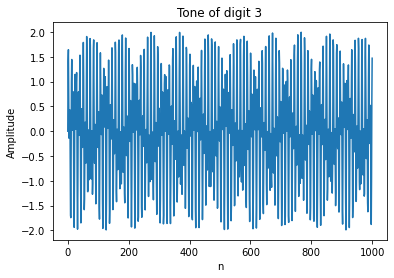

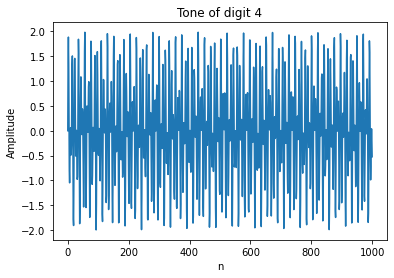

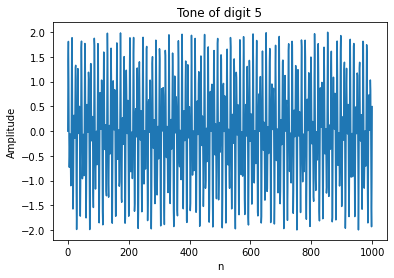

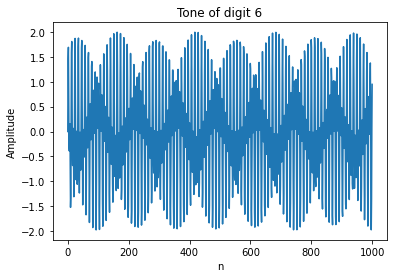

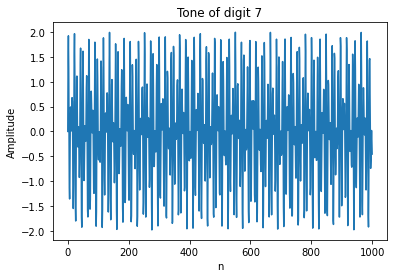

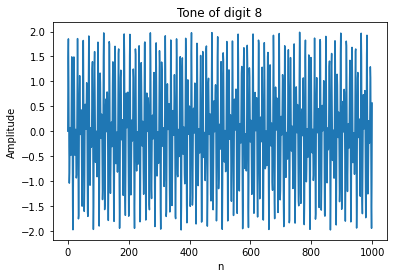

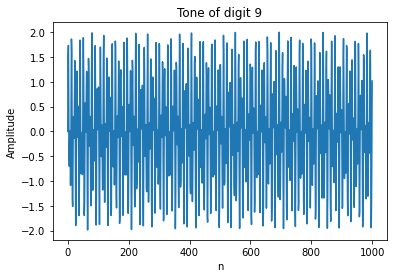

In [386]:
import os
import numpy as np
import pywt
import matplotlib.pyplot as plt
import IPython.display
import time
import wave
import scipy.signal as sp


row=np.array([0.5346,0.5906,0.6535])
column=np.array([0.9273,1.0247,1.1328])

n=np.linspace(0,1000,1000)# aksonas tou xronou 1000 digmata kai 1000 diastasi

d=[]
d=np.sin(0.7217*n)+np.sin(1.0247*n)

for i in range(3):
    for j in range(3):
        d0 = np.sin(row[i]*n)+np.sin(column[j]*n)
        d = np.vstack((d,d0))   #stoiva me ta 10 diaforetika simata twn psifiwn    


plt.figure(0)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 0")
plt.plot(n,(d[0]))#grafiki parastasi tou simatos d0 sinartisi tou xronou

plt.figure(1)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 1")
plt.plot(n,(d[1]))

plt.figure(2)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 2")
plt.plot(n,(d[2]))

plt.figure(3)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 3")
plt.plot(n,(d[3]))

plt.figure(4)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 4")
plt.plot(n,(d[4]))

plt.figure(5)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 5")
plt.plot(n,(d[5]))

plt.figure(6)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 6")
plt.plot(n,(d[6]))

plt.figure(7)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 7")
plt.plot(n,(d[7]))

plt.figure(8)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 8")
plt.plot(n,(d[8]))

plt.figure(9)
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("Tone of digit 9")
plt.plot(n,(d[9]))

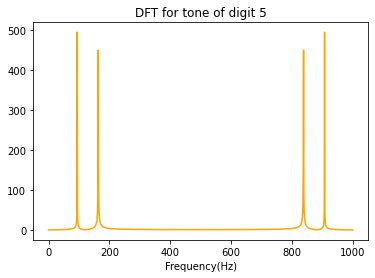

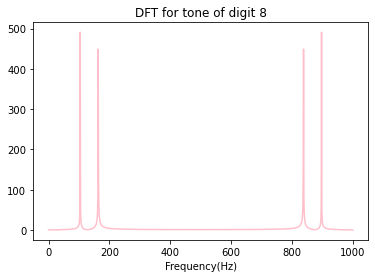

In [387]:
y1=np.fft.fft(d[5])#metasximatismos fourier tou simatos d5
y2=np.fft.fft(d[8])#metasximatismos fourier tou simatos d8
plt.figure(1) 
plt.xlabel('Frequency(Hz)')  
plt.title('DFT for tone of digit 5')
plt.plot(n,np.abs(y1),color='orange')
#grafiki parastasi tou metasximatismenou simatos D5 sinartisi tis sixnotitas

plt.figure(2) 
plt.xlabel('Frequency(Hz)')  
plt.title('DFT for tone of digit 8')
plt.plot(n,np.abs(y2),color='pink')

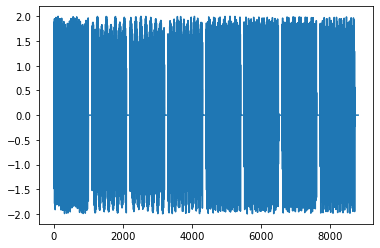

In [388]:
d = np.array(d)#ton metatrepoume se pinaka
z = np.zeros(100)#dimiourgo ena pinaka me 100 midenika o opios 8a mas xorizi ta simvola
#AM1=03119712 AM2=03119706
#AM=03119706+03119712=06239418
AM = [0,6,2,3,9,4,1,8]
phone=[]#dimiourgia pinaka me tous tilefonikous tonous
for i in AM:
    phone=np.append(phone,d[i])
    phone=np.append(phone,z)   #prosthetw ta 100 midenika 
n1=np.linspace(0,8800,8800)
plt.plot(n1,phone)



In [389]:
import soundfile as sf
song=sf.write('tone_sequence2.wav',phone,8800)


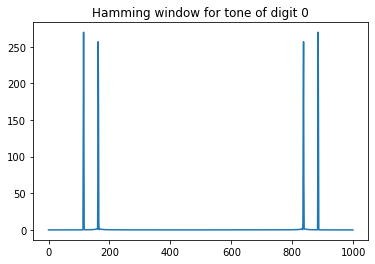

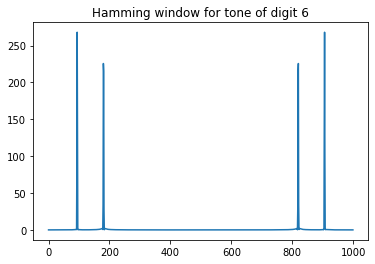

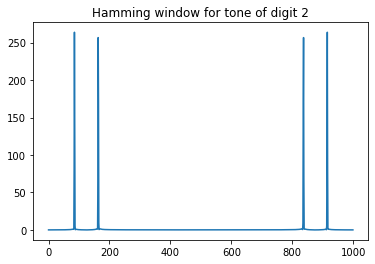

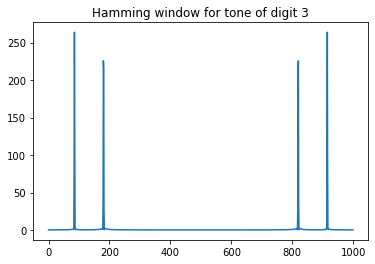

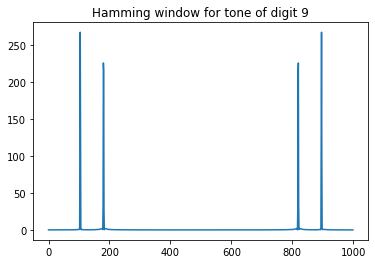

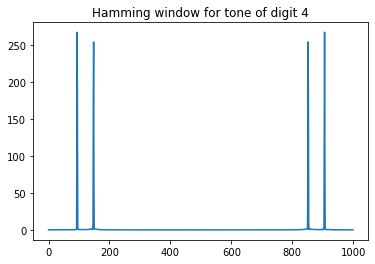

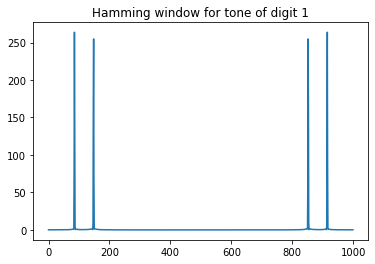

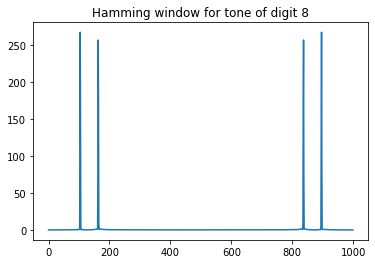

In [390]:
hwindow = np.hamming(1000) #parathiro hamming
swindow=np.ones(1000)     #tetragoniko para8iro
AM=[0,6,2,3,9,4,1,8]      #sima apo proigoumeno erwtima

hamming = [] #exoume ta parathiromena shmata hamming
j=0
for i in AM:
    plt.figure(j) #gia na kanw oles tis grafikes me tin mia   
    plt.title('Hamming window for tone of digit %i' %i)  # %i tha mou dwsei to i-digit p psaxnw
    hw = d[i] * hwindow
    hw = np.fft.fft(hw)
    hw = abs(hw)
    hamming.append(hw)
    plt.plot(hw)
    j+=1

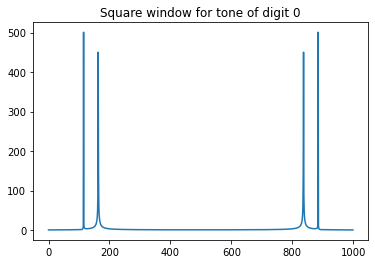

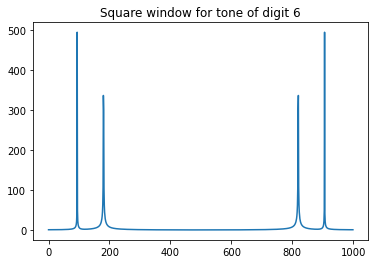

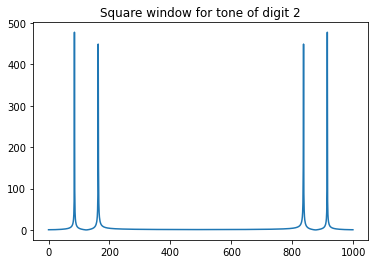

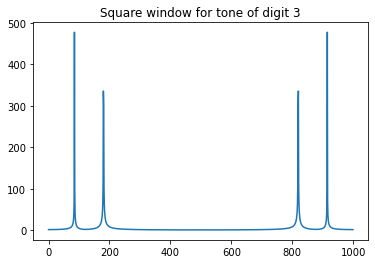

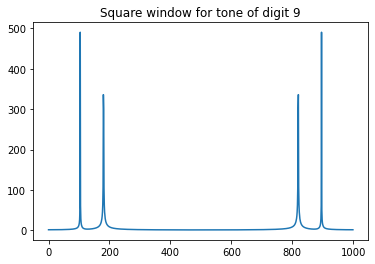

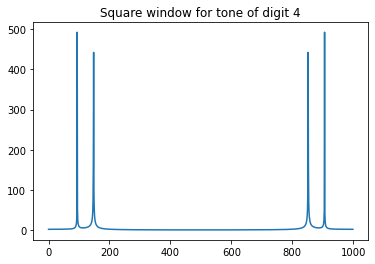

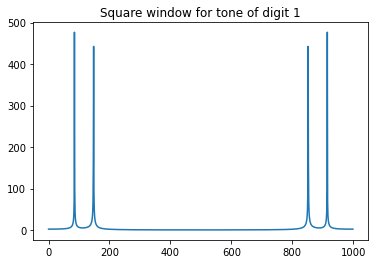

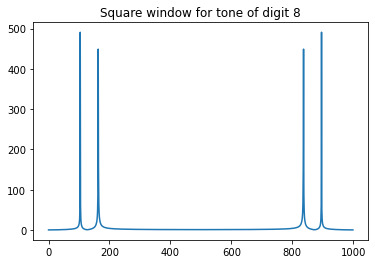

In [391]:
square = [] #exoyme ta para8yromena shmata square
j=0
for t in AM:
    plt.figure(j) #gia na exw panw apo mia grafikh xwrista    
    plt.title('Square window for tone of digit %i' %t )
    sw = d[t] * swindow
    sw = np.fft.fft(sw)
    sw = abs(sw)
    square.append(sw)
    plt.plot(sw)
    j = j + 1


In [392]:
row=np.array([0.5346,0.5906,0.6535])
column=np.array([0.9273,1.0247,1.1328])

k=[round((0.7217*1000)/(2*np.pi)),round((1.0247*1000)/(2*np.pi))] #deiktes kr kai kc gia to psifio 0

for i in range(3):
    for j in range(3):
        k0=[round((row[i]*1000)/(2*np.pi)) , round((column[j]*1000)/(2*np.pi))]#deiktes kr kai kc gia ta ipoloipa psifia
        k= np.vstack((k,k0))                                                     #prosthetw kathe psifio stin stoiva mou 
                
print(k)

[[115 163]
 [ 85 148]
 [ 85 163]
 [ 85 180]
 [ 94 148]
 [ 94 163]
 [ 94 180]
 [104 148]
 [104 163]
 [104 180]]


[[0.22041723 0.22047457 0.22064662 ... 0.22093352 0.22064662 0.22047457]
 [4.45077912 4.45171041 4.45450643 ... 4.4591736  4.45450643 4.45171041]
 [0.78514971 0.78613434 0.78909079 ... 0.79402678 0.78909079 0.78613434]
 ...
 [2.66935825 2.66965041 2.67052722 ... 2.67198971 2.67052722 2.66965041]
 [0.16827786 0.16860275 0.16957793 ... 0.17120502 0.16957793 0.16860275]
 [2.23162868 2.23200478 2.23313359 ... 2.23501658 2.23313359 2.23200478]]
[115. 163. 837. 885.  85. 148. 852. 915.  85. 163. 837. 915.  85. 180.
 820. 915.  94. 148. 852. 906.  94. 163. 837. 906.  94. 180. 820. 906.
 104. 148. 852. 896. 104. 163. 837. 896. 104. 180. 820. 896.]


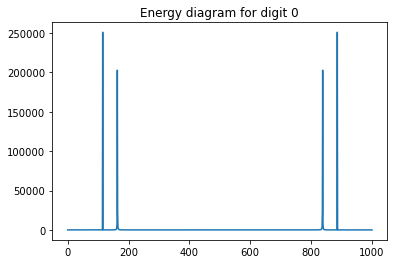

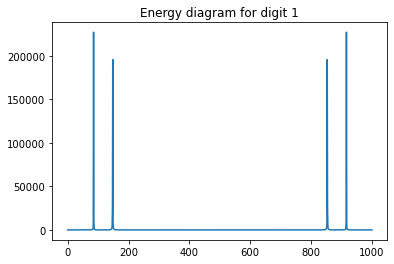

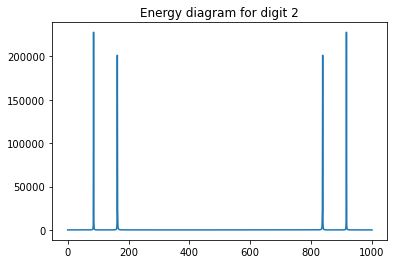

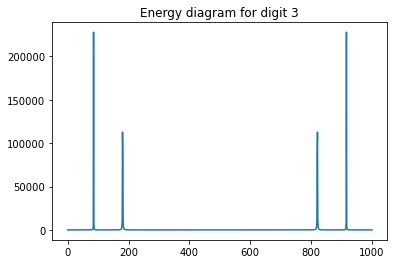

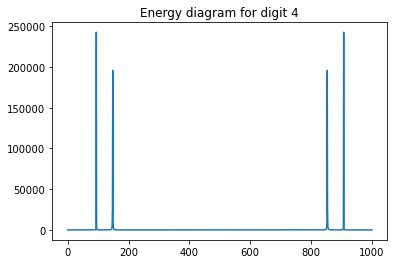

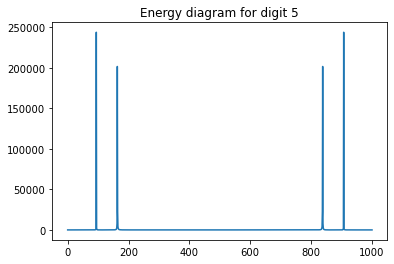

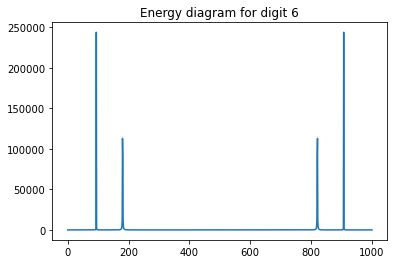

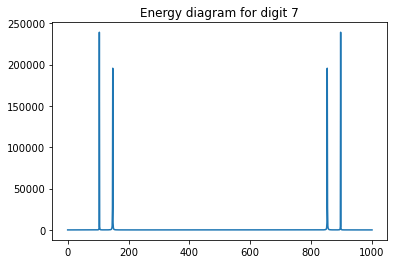

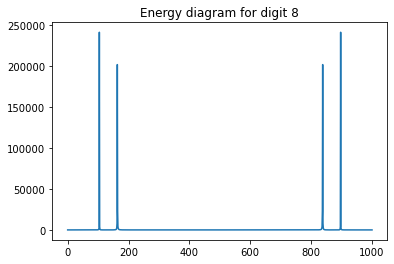

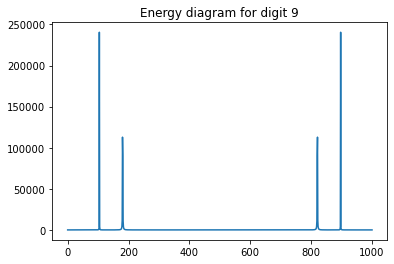

In [393]:
import scipy.signal
all_en=[]
n=np.linspace(0,1000,1000)
for i in range(10):           #vrisko tin energia ka8e simatos kai tin apo8ikevo me tin sira
    a=np.fft.fft(d[i])
    a= np.abs(a)
    a= a**2
    alla_en=all_en.append(a)

all_en = np.array(all_en)  
for i in range(10):
    plt.figure(i)
    plt.title('Energy diagram for digit %i' %i)
    plt.plot(n,all_en[i])
    
print(all_en)

peaks=[]
for z in all_en:
    peak,_= scipy.signal.find_peaks(z)#briskoume tis korifes gia kathe sima 
    peaks=np.append(peaks,peak)#apothikevoume oles tis korifes
print(peaks)




In [394]:
import scipy.signal
def ttdecode(ph):
    l=np.array([[115.,163.], #0 #ta peaks apo to 2.5 h energia ton megiston sixnotiton ka8e simatos
            [85.,148.],#1
            [85.,163.],#2
            [85.,180.],#3
            [94.,148.],#4
            [94.,163.],#5
            [94.,180.],#6
            [104.,148.],#7
            [104.,163.],#8
            [104.,180.]])#9
 
    Vector=[]
    counter=0
    num=len(ph)
    while counter < num: #oso iparxoun stixia tou ph(eisodos)
        tone=ph[:1000]   #apomonono kathe sima ana 1000 stoixeia 
        energy=np.abs(np.fft.fft(tone))**2  #energia tou tone   
        k=[]
        peak=np.array([])
        peaks, _ =scipy.signal.find_peaks(energy, height=100000)  #vriskei me vasi ta peaks tous antistoixous deiktes energeias
        k=np.append(k,peaks)                                       #me timi megaliterh tou 100000
        k=k[:2]                                              #pairnw tis prwtes dio times tou pinaka k(pinakas deiktwn energeiwn)
        for i in range(10):                 
             if k[0] == l[i,0] and k[1] == l[i,1]:  #an ta 2 stixia tou pinaka k antistixoun kai me ta dio stoixeia tou pinaka l
                dig= i                              #tote einai to antistixo sima-psifio 
        Vector= np.append(Vector, dig)    #apothikevo to antistoixo psifio sto vector 
        ph=ph[1000:]                      #sinexizo me to ipolipo sima
        counter+=1000                     #counter p simatodotei to telos tou psifiou
        m=0                                #counter gia midenika
        while ph[m]==0:
            m+=1
            if m>=len(ph)-1:               #vrogxos shmatodotisis telous gia ta teleutaia 100 midenika
                return np.array(Vector , dtype=np.int16) #epistrefei ton pinaka me ta psifia
        ph=ph[m:]
        counter+=m
vec=[]
vec= ttdecode(phone) #trexo ton algorithmo me tin isodo tou erotimatos 2.3
print('tone_sequence digits =', vec)

tone_sequence digits = [0 6 2 3 9 4 1 8]


In [396]:
easy=np.load('easy_sig.npy')           #fortosh arxiou easy_sig.npy
z = np.zeros(100)                      #pinakas 100 midenikon pou tha prosthesw sto telos tou simatos
easy=np.append(easy,z)
v=[]         
v=ttdecode(easy)                      #trexo ton algori8mo me ta stixia tou arxiou easySig.npy
print('tone_sequence digits of easy_Sig.npy =', v)


hard = np.load('hard_sig.npy')         #fortosh arxiou hard_sig.npy
hard=np.append(hard,z)                 #pinakas 100 midenikon pou tha prosthesw sto telos tou simatos
vec=[]
vec=ttdecode(hard)                     #trexo ton algori8mo me ta stixia tou arxiou hardSig.npy
print('tone_sequence digits of hard_Sig.npy =', vec)#telos merous b

tone_sequence digits of easy_Sig.npy = [7 3 5 8 2 8 0 2]
tone_sequence digits of hard_Sig.npy = [4 3 5 6 6 2 0 9 9 5]
